# Regularization

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = make_regression(10000, 100, 8, coef=True, random_state=666)

#### Split the data into train and test sets

In [ ]:
X=data[0]
y=data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=666)

#### Create a LassoCV object 
- Calculate for an alpha of .1
- set ```normalize``` to ```True``` too make sure our data is standardized.

In [ ]:
lasso_cv = LassoCV(
    n_alphas=1,
    alphas=[.1],
    cv=10,
    normalize=True
)

lasso_cv.fit(X_train, y_train)

#### Calculate the error for our train and test data

In [ ]:
preds = lasso_cv.predict(X_test)
train_error = np.mean(lasso_cv.mse_path_)
test_error = mean_squared_error(
    y_test, preds
)

#### Now let's create a function called ```lasso_errors``` using the code from above:

<u>This function should:</u>
- Receive a single input called ```alpha```.
- Output the train and test errors.

#### Put this function inside of a loop and run it for alphas of [1e-8, 1e-6, 1e-3, 1e-1]
> Which alpha minimizes test mse?

In [6]:
def lasso_errors(alpha):
    lasso_cv = LassoCV(
    n_alphas=1,
    alphas=[alpha],
    cv=10,
    normalize=True
)

    lasso_cv.fit(X_train, y_train)
    preds = lasso_cv.predict(X_test)
    train_error = np.mean(lasso_cv.mse_path_)
    test_error = mean_squared_error(
        y_test, preds
    )
    
    return train_error, test_error

test_errors = []
train_errors = []
alphas = [1e-8, 1e-6, 1e-3, 1e-1]

for alpha in alphas:

    train_error, test_error =  lasso_errors(alpha)
    
    train_errors.append(train_error) 
    test_errors.append(test_error)
    
min_alpha_index = (
    np.array(
        test_errors
    )
    .argmin()
)

print(f'min alpha: {test_errors[min_alpha_index]}')

min alpha: 6.799786828219997e-08


#### Let's graph out train and test error.

In [ ]:
fig, ax = plt.subplots()
ax.plot(alphas, train_errors, label='train')
ax.plot(alphas, test_errors, label='test')
ax.legend()
ax.set_xticks(alphas)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show();

#### DOUBLE BONUS

<b><u>Create a function that:</u></b>
- Takes in a *range* of alphas and generates the train/test error graph created above

*Use ```np.linspace(1e-8, 1e-5, 20)``` as the input to generate 20 alpha values.*

min alpha: 3.146524697979642e-08


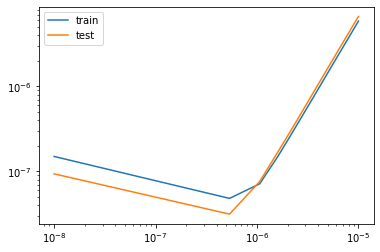

In [5]:
def graph_errors(alphas):
    test_errors = []
    train_errors = []

    for alpha in alphas:

        train_error, test_error =  lasso_errors(alpha)

        train_errors.append(train_error) 
        test_errors.append(test_error)

    
    min_alpha_index = (
        np.array(
            test_errors
        )
        .argmin()
        )

    print(f'min alpha: {test_errors[min_alpha_index]}')
    
    fig, ax = plt.subplots()
    ax.plot(alphas, train_errors, label='train')
    ax.plot(alphas, test_errors, label='test')
    ax.legend()
    ax.set_xticks(alphas)
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.show();

    
graph_errors(np.linspace(1e-8, 1e-5, 20))